# COVID-19 PROFILES IN SADC

    Author: Brilliant Chikanya
    
### A dive into the impact of Covid-19 on SADC

Hello world. Let us begin by importing the necessary libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns

Next, let us load the data

In [2]:
df = pd.read_csv('owid-covid-data.csv', parse_dates=[3])

Let us view the first 5 records

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# Set the date as the index:

df.set_index('date', inplace=True)
df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


This analysis will focus on the following 5 countries...

In [6]:
# Let's create a list that contains the 5 countries:

sadc = ['Zimbabwe', 'Zambia', 'Botswana', 'South Africa', 'Namibia']
sadc.sort()

# Extract the SADC countries data

In [7]:
# Create an empty list which will contain each SADC country's data
dfs = []
for i in sadc:
    # Create a boolean mask to use to filter each country
    BM = df['location'] == i
    # Use the boolean mask to filter out each SADC country and create its dataset
    data = df[BM]
    # add each country's data to the list
    dfs.append(data)
# Combine the datasets for the 5 countries    
df_sadc = pd.concat(dfs)

Create a list of variables we will use for our analysis

In [8]:
cols = ['location', 'new_cases', 'total_cases', 'total_deaths', 'new_cases_smoothed', 'new_deaths_smoothed', 
        'total_deaths_per_million']

In [9]:
to_drop = [column for column in df_sadc.columns if column not in cols]

In [10]:
df_sadc = df_sadc.drop(columns=to_drop)

In [11]:
df_sadc[::100]

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_deaths_per_million
date,,,,,,,
2020-03-30,Botswana,3.0,3.0,NaN,NaN,NaN,NaN
2020-07-08,Botswana,314.0,0.0,12.429,1.0,0.000,0.417
2020-10-16,Botswana,5242.0,1328.0,289.000,20.0,0.286,8.343
2021-01-24,Botswana,19654.0,0.0,327.000,105.0,4.857,43.800
2021-05-04,Botswana,47851.0,0.0,178.714,724.0,3.143,302.014
2021-08-12,Botswana,136758.0,5987.0,2026.286,1973.0,38.429,823.030
2021-11-20,Botswana,194445.0,0.0,106.286,2416.0,0.714,1007.826
2022-02-28,Botswana,263950.0,0.0,185.429,2619.0,0.714,1092.506
2020-03-31,Namibia,11.0,0.0,0.571,NaN,NaN,NaN


### Create a function to generate average monthly plots for covid-19

In [12]:
def plot_monthly_cases(country):
    """
    This function plots the monthly average cases of covid-19 recorded in each country
    """
    # Create a BM to filter each country
    BM = df_sadc['location'] == country
    
    # Data for each country:
    data = df_sadc[BM]
    
    # Let's get the month number from the index 
    criteria = data.index.month
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    
    y = data['new_cases'].groupby(criteria).mean()
    plt.bar(months, y, color='green')
    #plt.xticks(months, rotation=90)
    #plt.xlabel('Source:https://ourworldindata.org')
    plt.ylabel('Recorded cases')
    plt.title('Average monthly recorded cases in' + ' ' + country)
    
    

plt.show    

<function matplotlib.pyplot.show(*, block=None)>

# Plot the average monthly covid-19 cases 

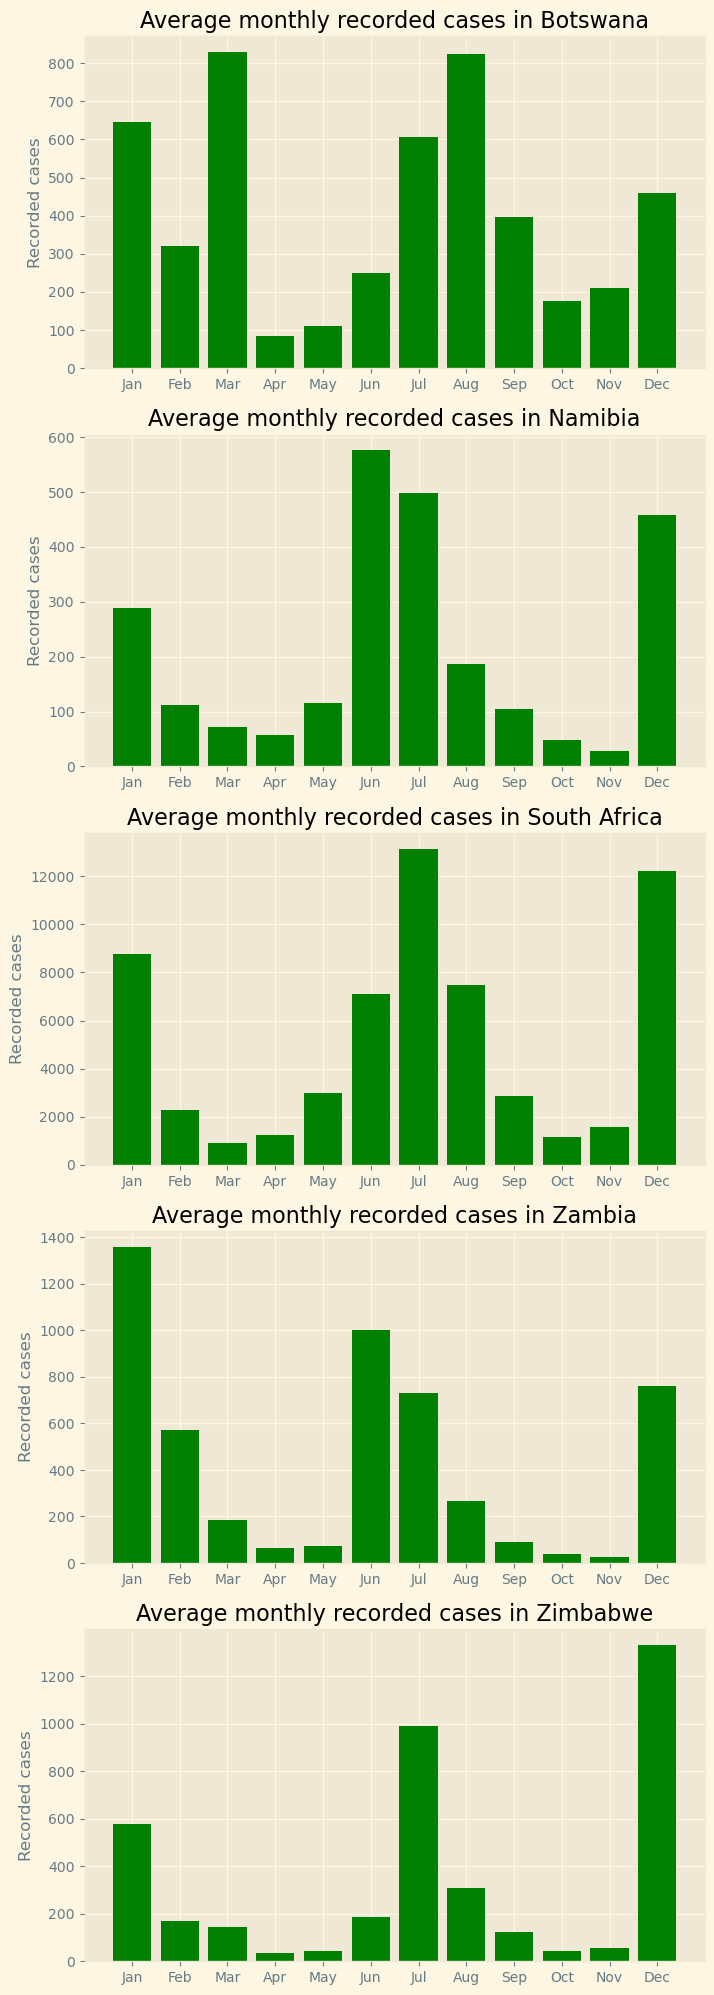

In [20]:
fig, ax = plt.subplots(5, 1, figsize=(8, 25))
for index, country in enumerate(sadc):
    plt.subplot(5, 1, index+1)
    plot_monthly_cases(country)

---
> The next thing is to comment on these visuals

### Create another function to plot 3 graphs for each country 

In [27]:
# Extract a dataframe for a country, e.g Zimbabwe
def plot_country(country):
    """ 
    This is a function that takes in a country's name and plots three graphs,
    the first for new cases, secondly, total cases, and lastly total deaths.
    """
    
    filters = ['new_cases', 'total_cases', 'total_deaths']
    
    BM = df_sadc['location'] == country
    
    data = df_sadc[BM]
    
    with plt.style.context('grayscale'):
        fig, ax = plt.subplots(3, 1, figsize=(8, 24))
    
        for i, f in enumerate(filters):
            BM = f
            plt.subplot(3, 1, i+1)
            plt.plot(data[f], label=f)
            plt.xticks(rotation=90)
            plt.title(country + ' ' + f)

plt.tight_layout()
plt.show()    

<Figure size 640x480 with 0 Axes>

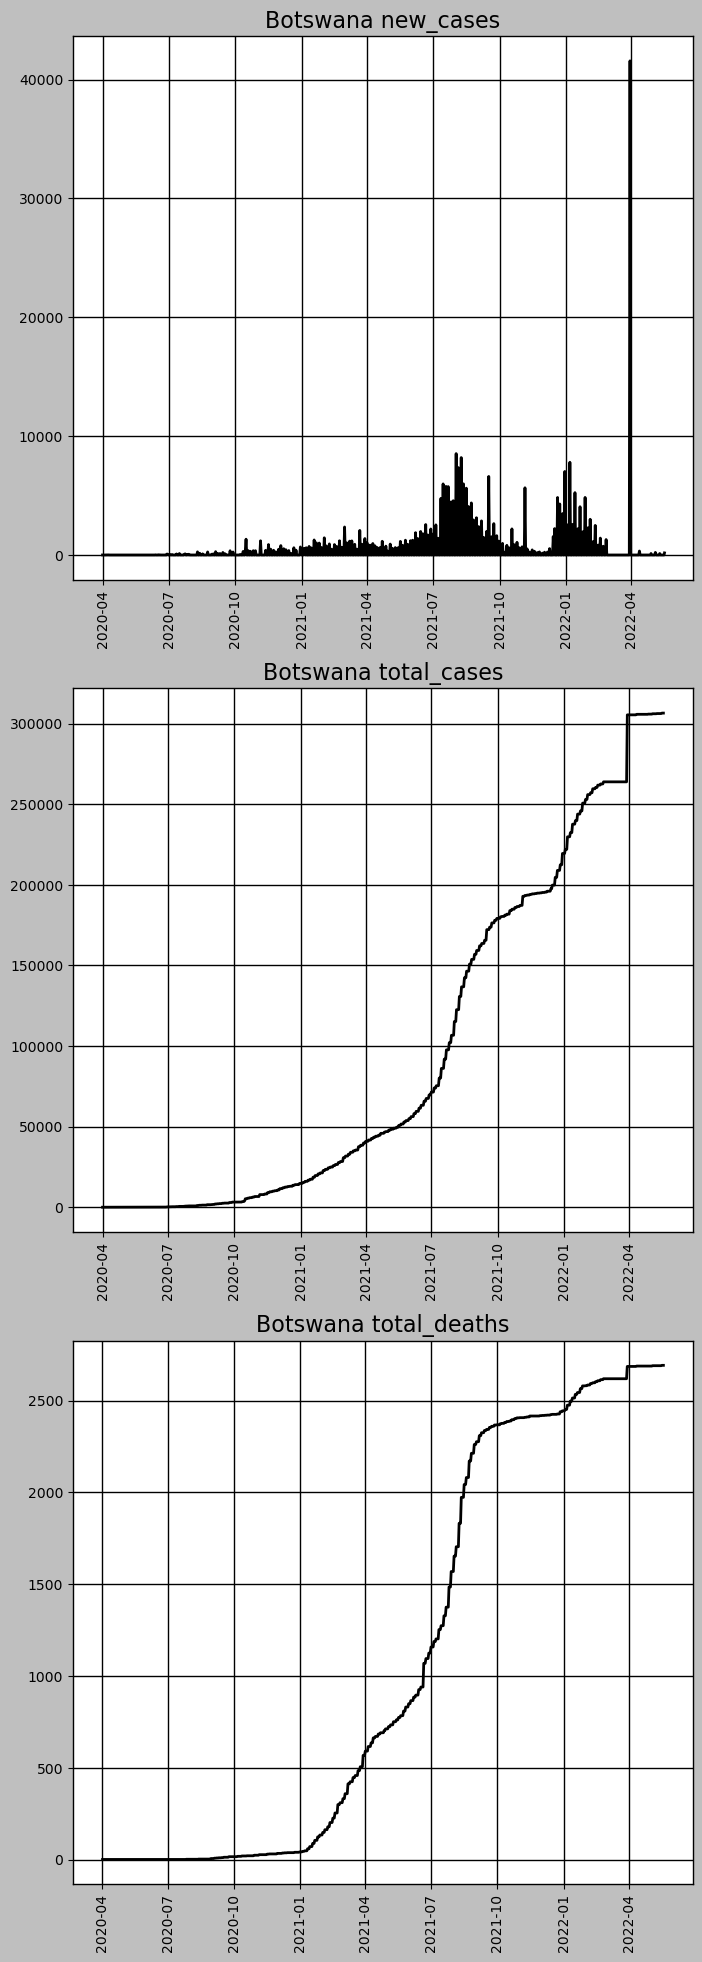

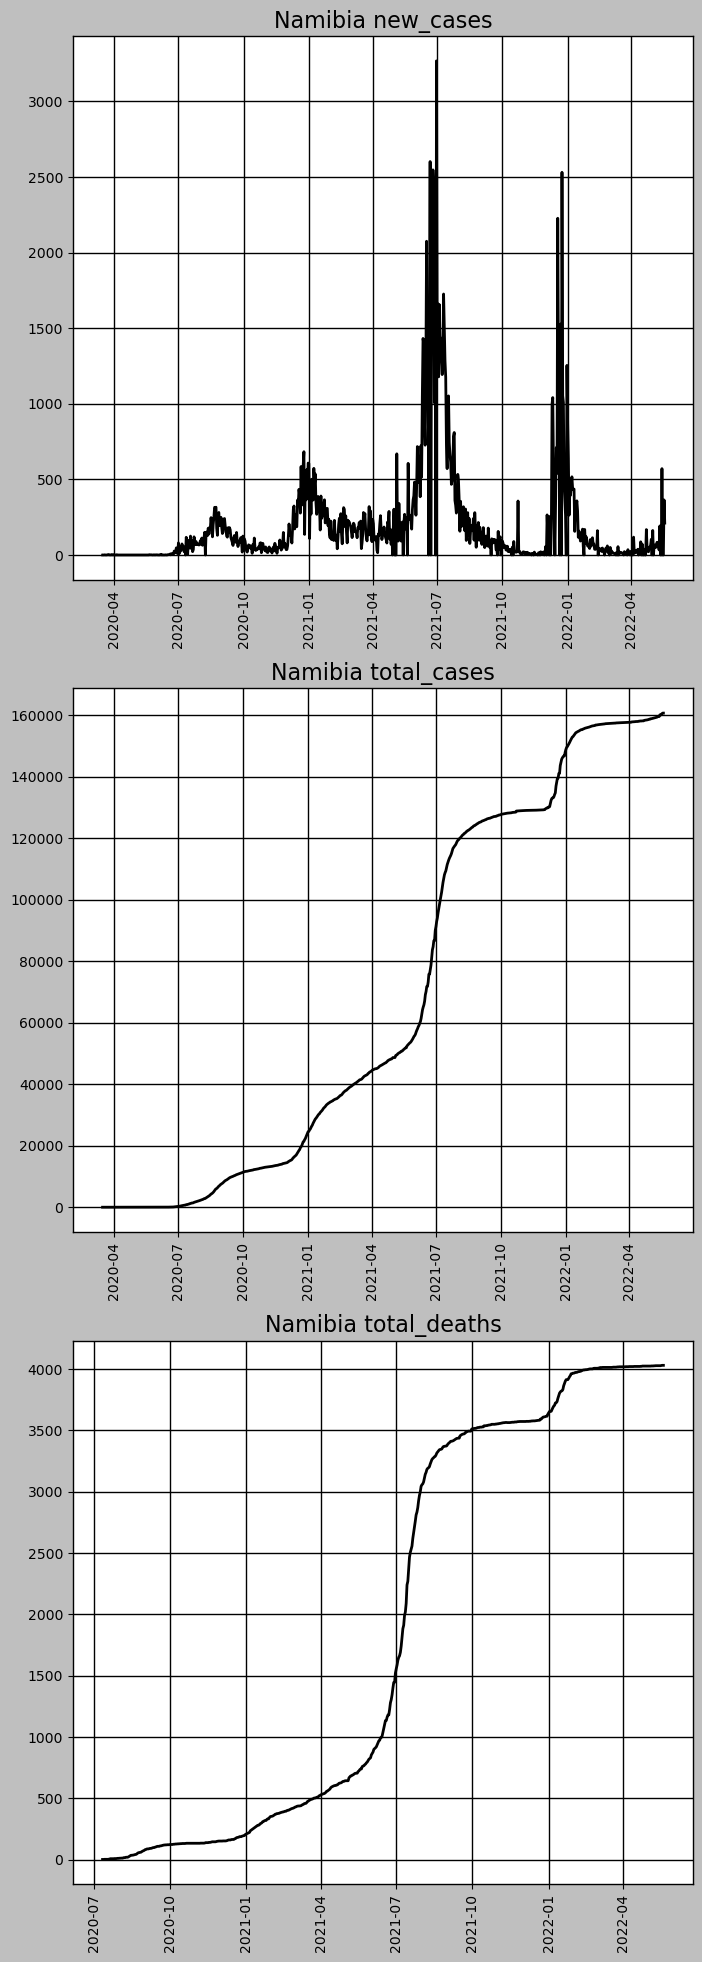

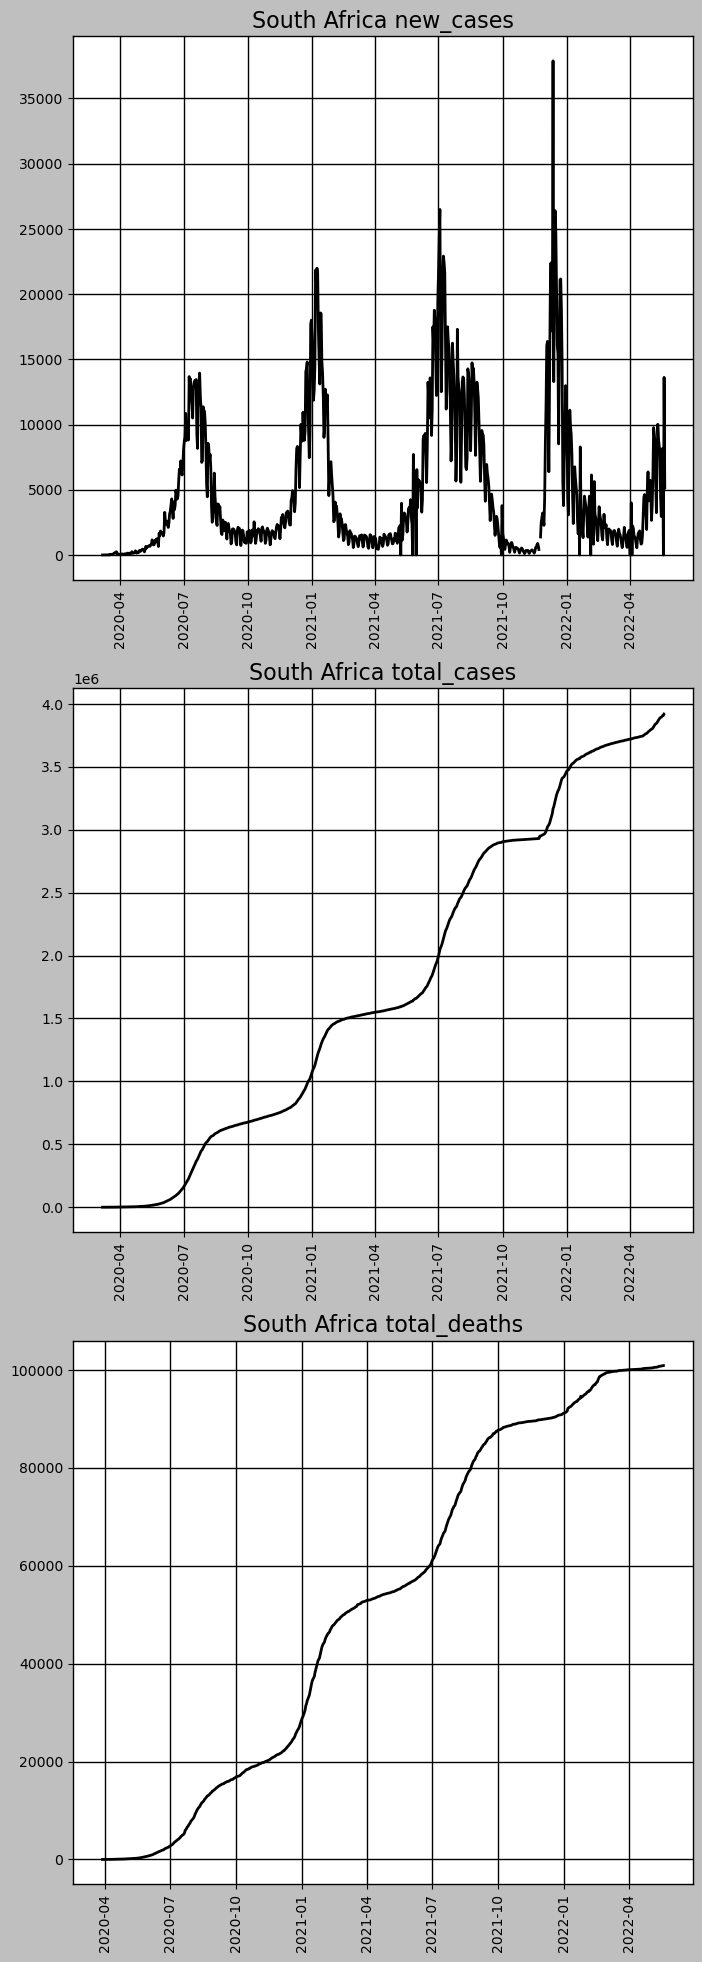

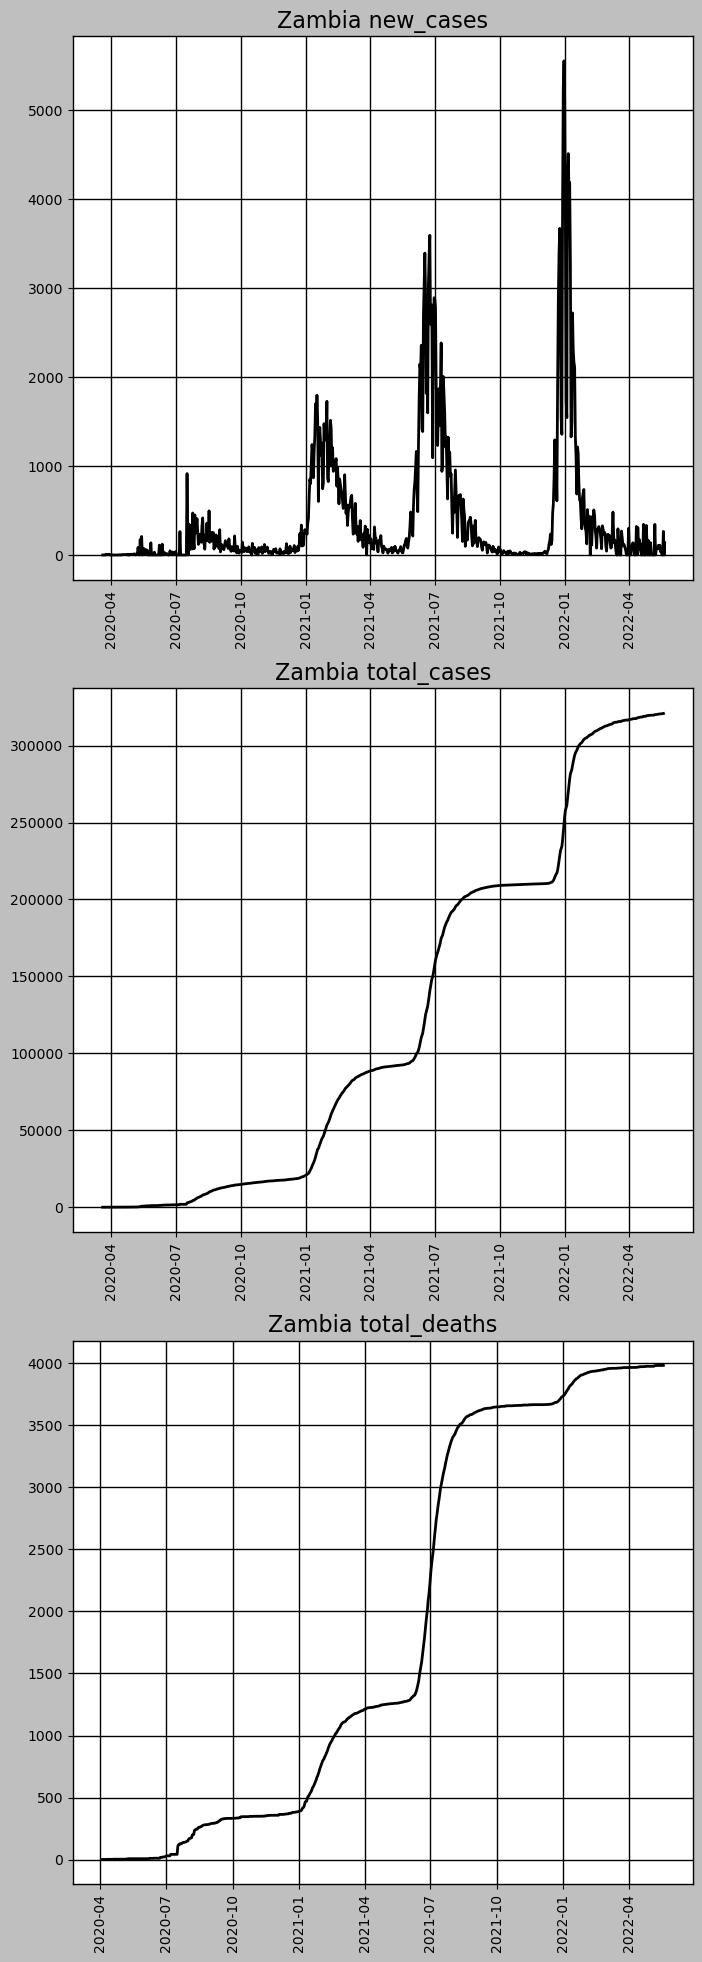

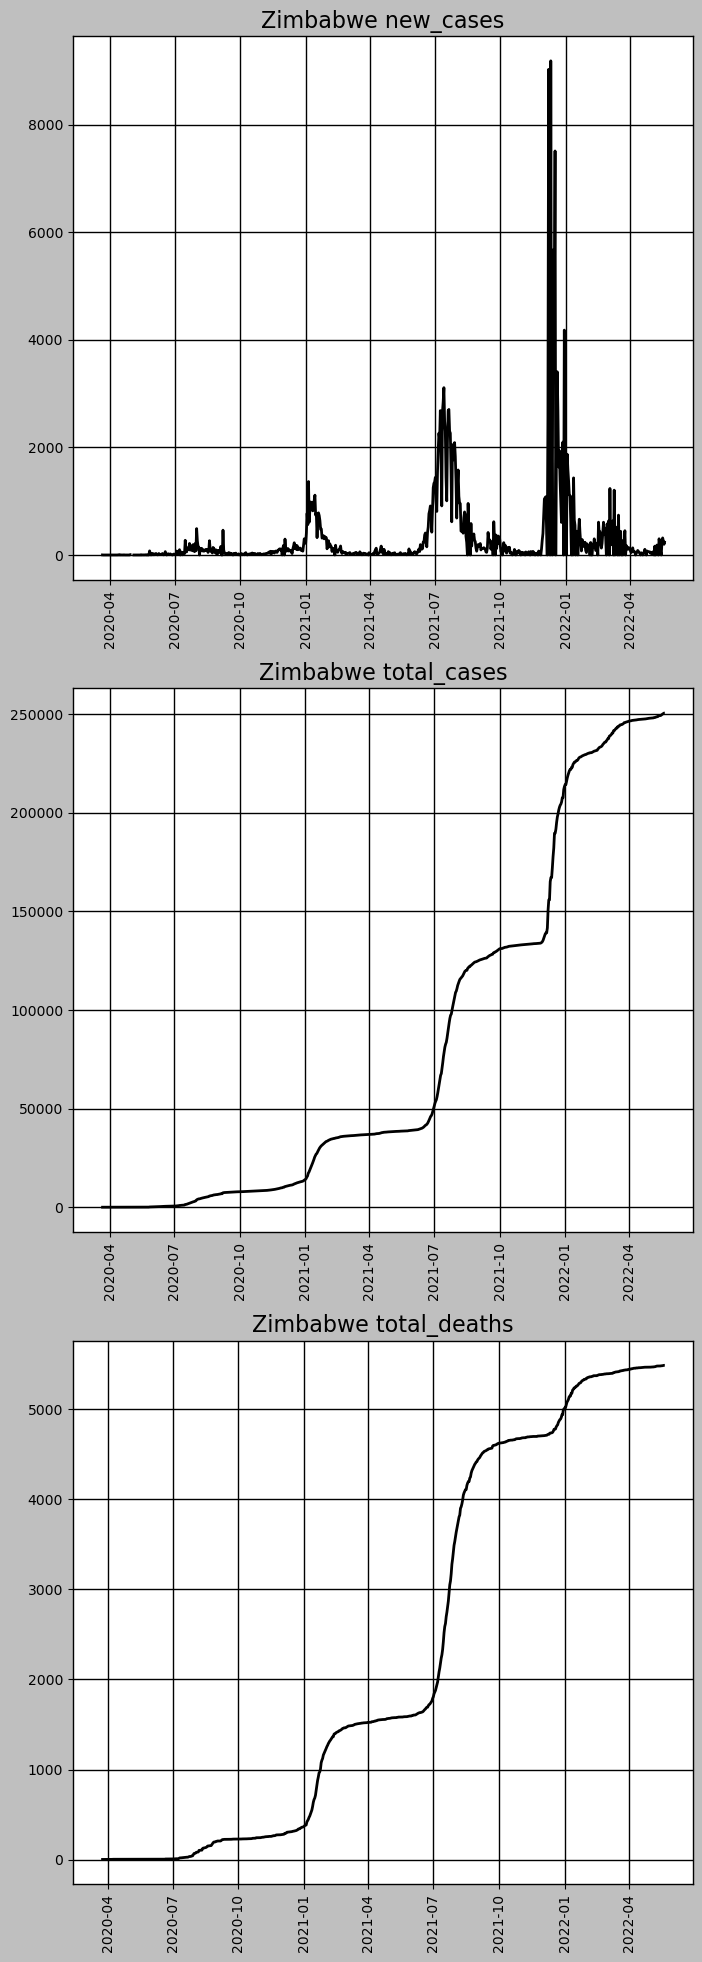

In [28]:
for country in sadc:
    plot_country(country)

In [16]:
def another_plot_country(country):
    """ 
    This is a function that takes in a country's name and plots three graphs
     the first for new cases smoothed, secondly, new deaths smoothed, and lastly total deaths per million
    """
    
    filters = ['new_cases_smoothed', 'new_deaths_smoothed', 'total_deaths_per_million']
    
    data = df_sadc[df_sadc['location'] == country]
    
        
    fig, ax = plt.subplots(3, 1, figsize=(8, 15))
    
    for i, f in enumerate(filters):
        BM = f
        plt.subplot(3, 1, i+1)
        plt.plot(data[f], label=f)
        #plt.xticks(rotation=90)
        plt.title(country + ' ' + f)


plt.show()

<IPython.core.display.Javascript object>


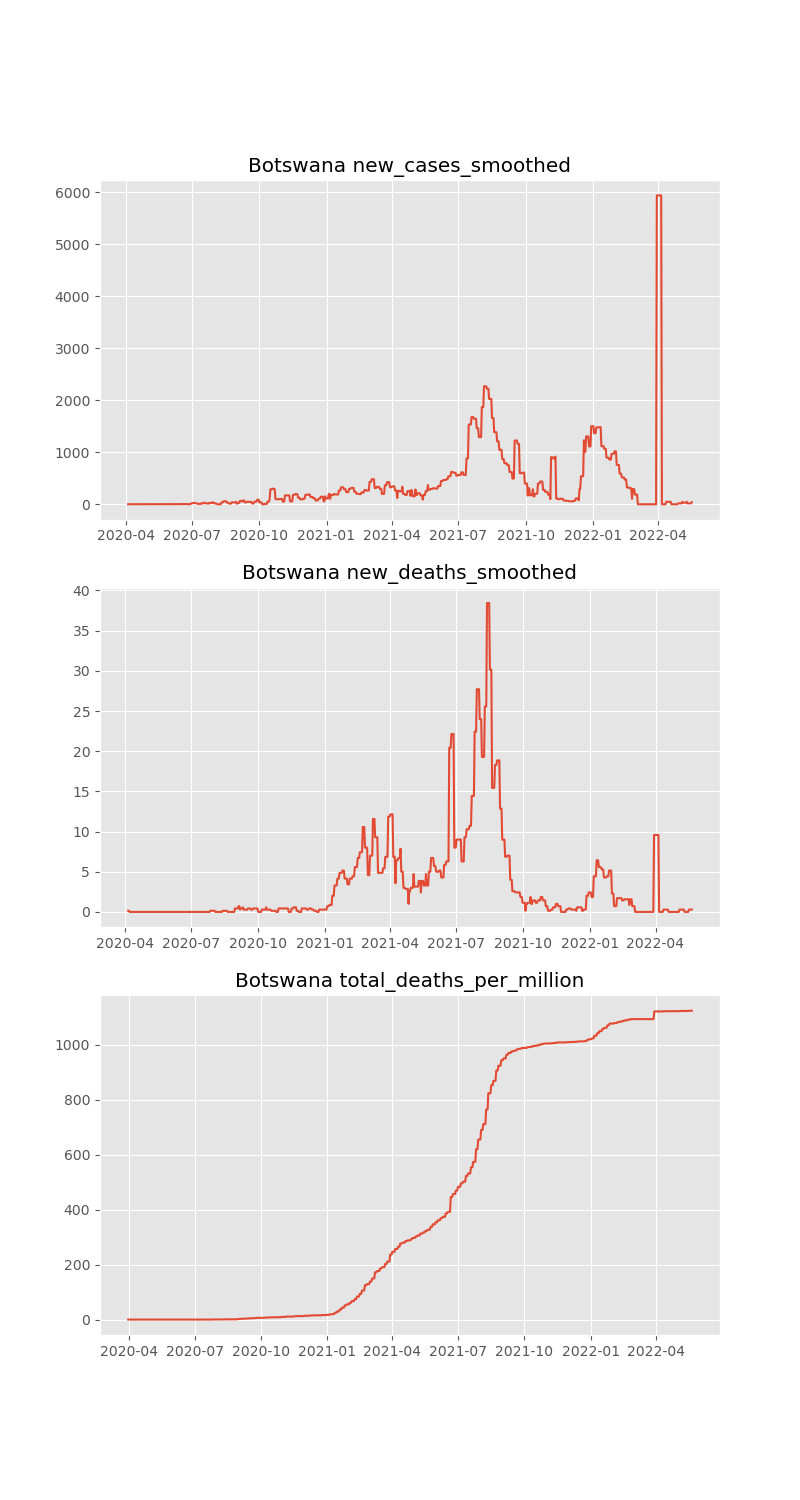

<IPython.core.display.Javascript object>


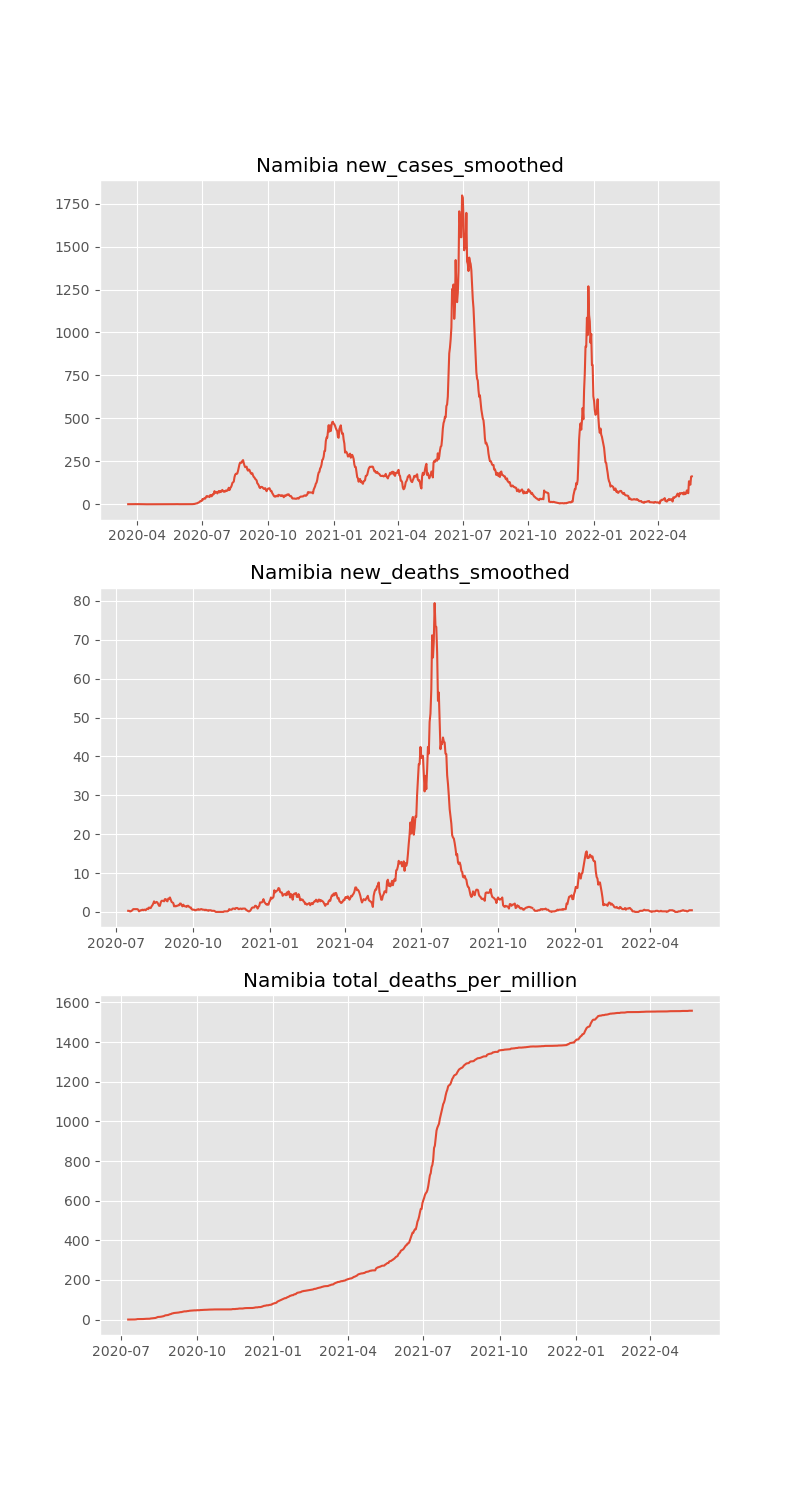

<IPython.core.display.Javascript object>


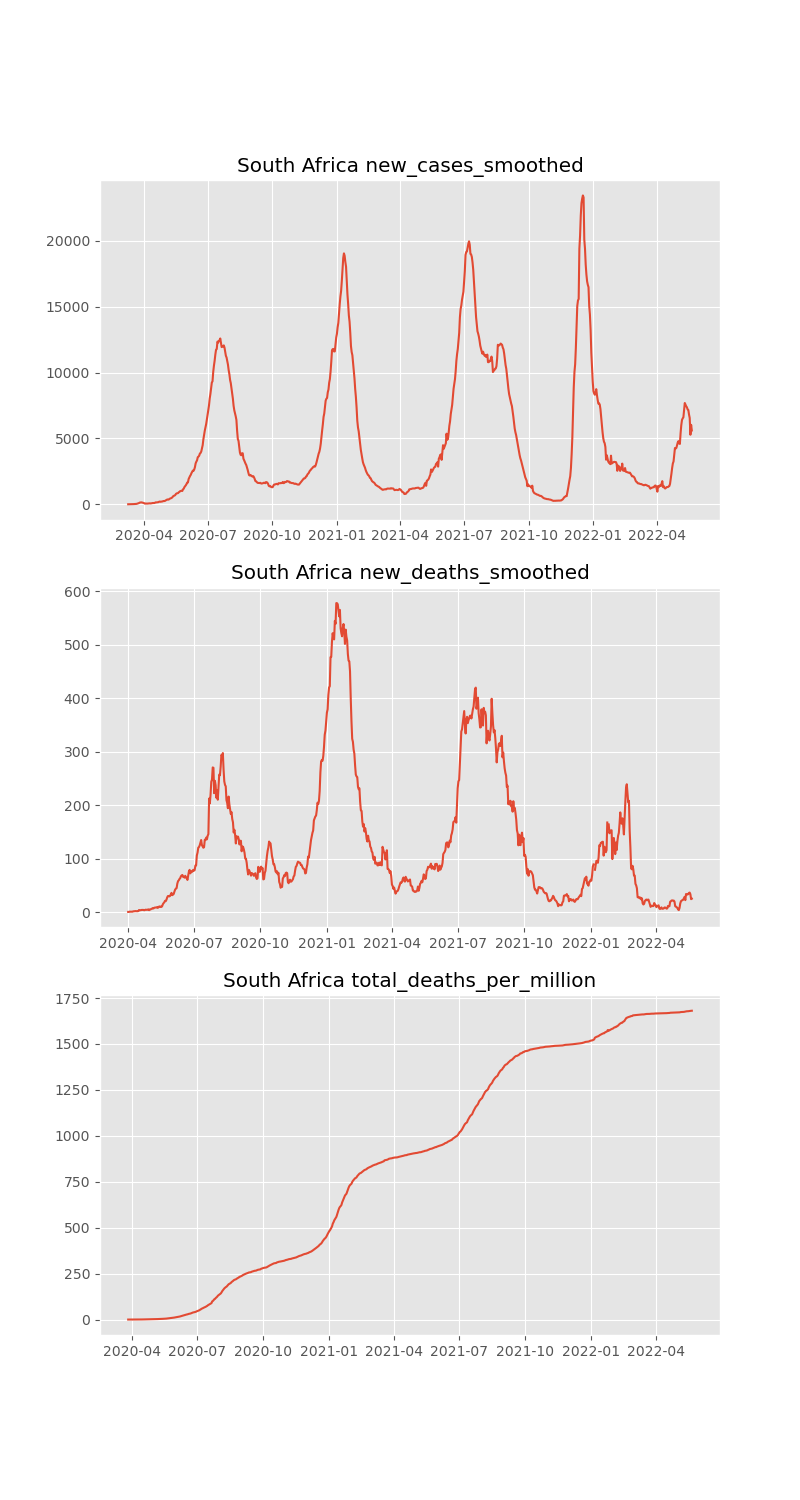

<IPython.core.display.Javascript object>


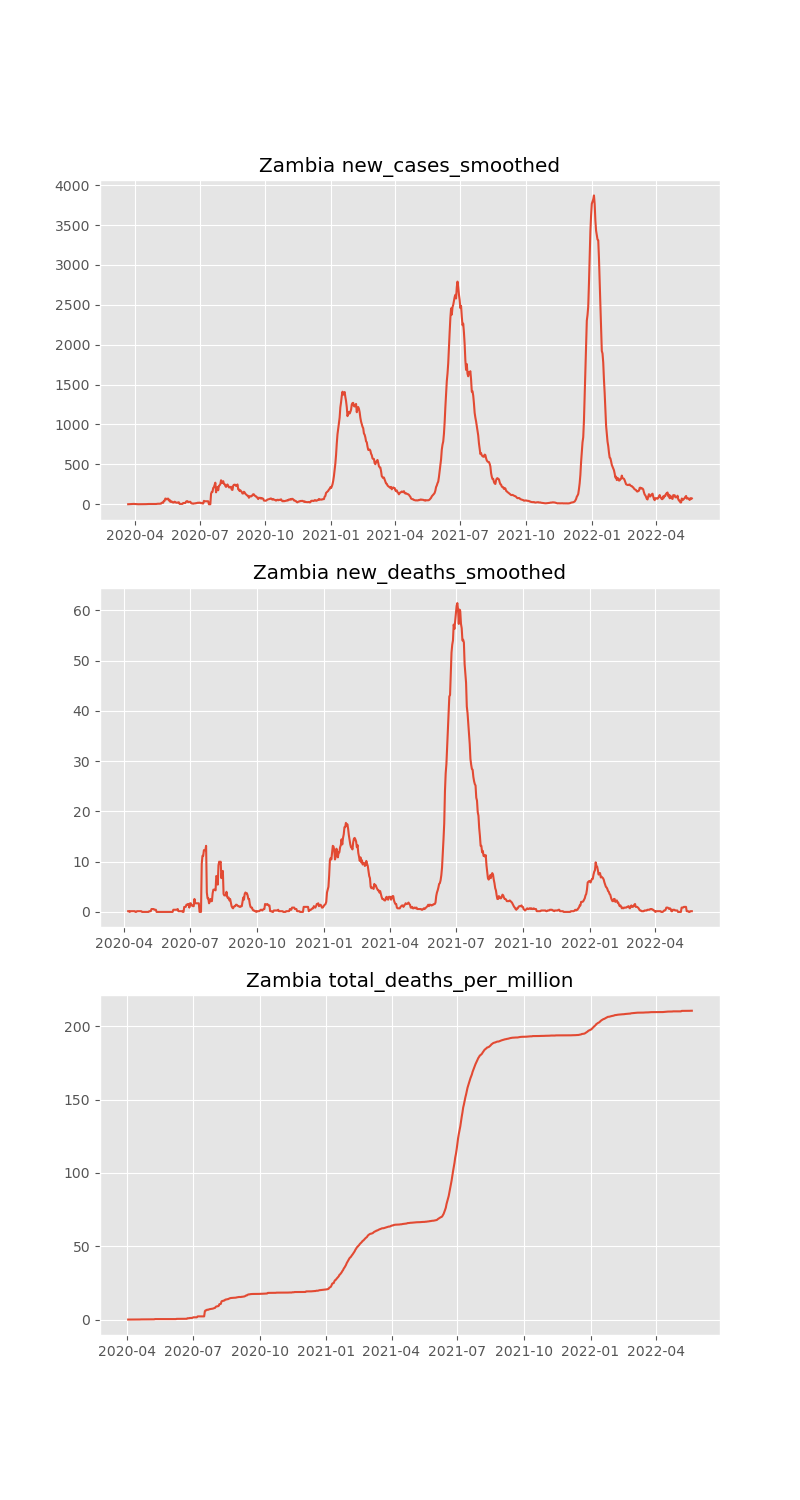

<IPython.core.display.Javascript object>


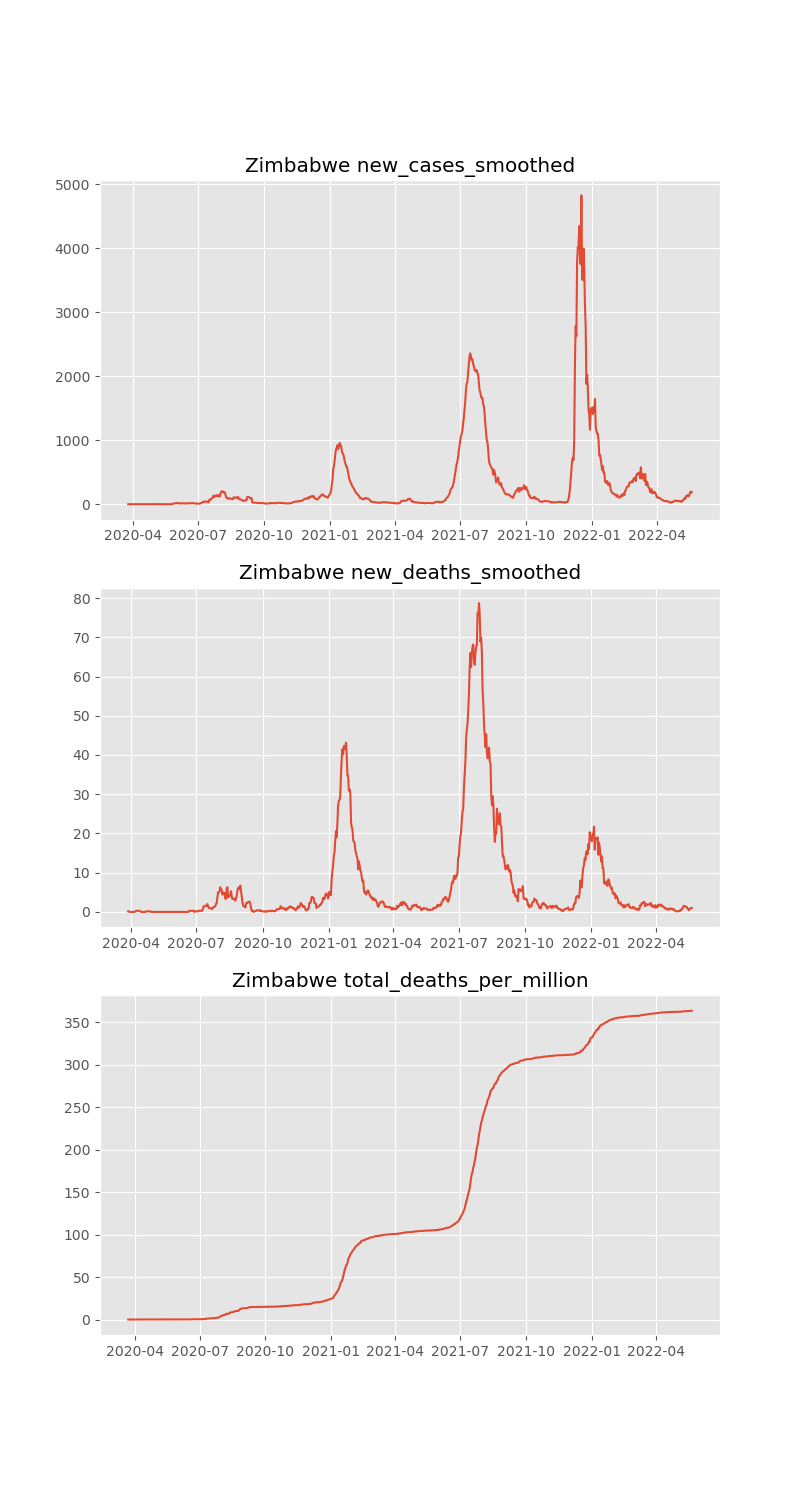

In [17]:
for country in sadc:
    another_plot_country(country)